# Task 1

---

## Web scraping and analysis

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Very poor service, very fru..."
1,Not Verified | Generally poor. Sent to gate o...
2,Not Verified | BA changed our prepaid seats a...
3,Not Verified | Flew from London Heathrow to M...
4,Not Verified | I was meant to fly in January t...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
data= pd.read_csv("BA_reviews.csv", index_col=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [7]:
data.head(10)

,reviews
0,"✅ Trip Verified | Very poor service, very fru..."
1,Not Verified | Generally poor. Sent to gate o...
2,Not Verified | BA changed our prepaid seats a...
3,Not Verified | Flew from London Heathrow to M...
4,Not Verified | I was meant to fly in January t...
5,✅ Trip Verified | We have flown repeatedly wi...
6,✅ Trip Verified | I was horrified by the extr...
7,✅ Trip Verified | \r\nThe worst cabin experie...
8,✅ Trip Verified | First time flying with Briti...
9,✅ Trip Verified | The latest affront. Stood i...


### Importing Necessary Libraries for text Analysis:

In [82]:
import nltk
from nltk.corpus import stopwords
import string

In [254]:
def transform_sentence(text):
    # Converting to lower case:
    text = text.lower()
    # word_tokenization:
    text = nltk.word_tokenize(text)
    #removing all non alphanumeric values:
    y = []
    for i in text[3:]:
        if i.isalnum():
            y.append(i)
    
    return ' '.join(y)

In [255]:
data['transformed_text'] = data['reviews'].apply(transform_sentence)

In [256]:
data.head(10)

,reviews,transformed_text
0,"✅ Trip Verified | Very poor service, very fru...",very poor service very frustrating firstly my ...
1,Not Verified | Generally poor. Sent to gate o...,generally poor sent to gate on time sat maybe ...
2,Not Verified | BA changed our prepaid seats a...,ba changed our prepaid seats at the last minut...
3,Not Verified | Flew from London Heathrow to M...,flew from london heathrow to marrakech ba chan...
4,Not Verified | I was meant to fly in January t...,i was meant to fly in january to algeria i pai...
5,✅ Trip Verified | We have flown repeatedly wi...,we have flown repeatedly with british airways ...
6,✅ Trip Verified | I was horrified by the extr...,i was horrified by the extremely small seats a...
7,✅ Trip Verified | \r\nThe worst cabin experie...,the worst cabin experience ever cramped seats ...
8,✅ Trip Verified | First time flying with Briti...,first time flying with british airways and fir...
9,✅ Trip Verified | The latest affront. Stood i...,the latest affront stood in first class line f...


### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [257]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [258]:
sentiment = SentimentIntensityAnalyzer()

In [259]:
sentiments = []
compound_score = []
for text in data['transformed_text']:
    polarity = sentiment.polarity_scores(text)
    compound_score.append(polarity['compound'])
    if polarity['compound'] >= 0.05:
        sentiments.append('postive')
    elif polarity['compound'] > -0.05 and polarity['compound']<0.05:
        sentiments.append('Neutral')
    else:
        sentiments.append('negative')

In [260]:
sentiment_analysis = pd.DataFrame(list(zip(sentiments, compound_score)), columns=['sentiment','compound_score'])

In [261]:
sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sentiment       1000 non-null   object 
 1   compound_score  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [262]:
data.head()

,reviews,transformed_text
0,"✅ Trip Verified | Very poor service, very fru...",very poor service very frustrating firstly my ...
1,Not Verified | Generally poor. Sent to gate o...,generally poor sent to gate on time sat maybe ...
2,Not Verified | BA changed our prepaid seats a...,ba changed our prepaid seats at the last minut...
3,Not Verified | Flew from London Heathrow to M...,flew from london heathrow to marrakech ba chan...
4,Not Verified | I was meant to fly in January t...,i was meant to fly in january to algeria i pai...


In [263]:
sent_data = pd.concat([data,sentiment_analysis], axis = 1)

In [264]:
sent_data.head()

,reviews,transformed_text,sentiment,compound_score
0,"✅ Trip Verified | Very poor service, very fru...",very poor service very frustrating firstly my ...,negative,-0.9669
1,Not Verified | Generally poor. Sent to gate o...,generally poor sent to gate on time sat maybe ...,negative,-0.1935
2,Not Verified | BA changed our prepaid seats a...,ba changed our prepaid seats at the last minut...,postive,0.4588
3,Not Verified | Flew from London Heathrow to M...,flew from london heathrow to marrakech ba chan...,negative,-0.6740
4,Not Verified | I was meant to fly in January t...,i was meant to fly in january to algeria i pai...,negative,-0.8133


In [267]:
sent_data.sentiment.value_counts()

postive     536
negative    445
Neutral      19
Name: sentiment, dtype: int64

<AxesSubplot:>

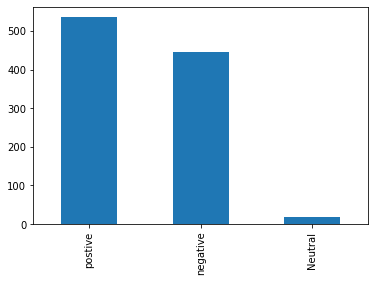

In [265]:
sent_data.sentiment.value_counts().plot(kind= 'bar')

In [243]:
neg_word_corpus = []

for text in sent_data[sent_data['sentiment']=='negative']['transformed_text'].tolist():
    for word in text.split():
        neg_word_corpus.append(word)

C:\Users\varun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


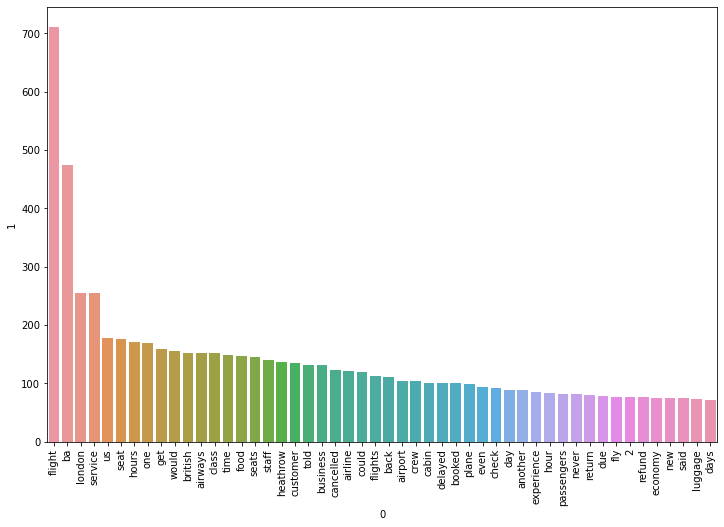

In [244]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(neg_word_corpus).most_common(50))[0],pd.DataFrame(Counter(neg_word_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')
plt.show()